# Import necessary library

In [1]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Suppress warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv('generated_dataset.csv')

In [3]:
data.head()

Wellhead Temp. (C)  Wellhead Press (psi)  MMCFD- gas  \
0               53.35               1105.13       12.87   
1               72.25               1026.31        3.42   
2               65.08                722.96        6.23   
3               60.71               1557.23       11.71   
4               46.19               1304.42        8.58   

   BOPD (barrel of oil produced per day)  \
0                                1378.93   
1                                1028.75   
2                                2017.92   
3                                 558.22   
4                                1280.47   

   BWPD (barrel of water produced per day)  BSW - basic solid and water (%)  \
0                                  2812.62                            75.64   
1                                   919.92                            44.21   
2                                  1212.42                            17.55   
3                                  1716.09                            65.79   
4                                  1929.22                            37.45   

   CO2 mol. (%) @ 25 C & 1 Atm.  Gas Grav.  CR-corrosion defect  
0                        3.3628     0.7205               0.2245  
1                        3.8679     0.8940               0.2262  
2                        2.3552     0.7661               0.2305  
3                        1.7253     0.7738               0.2303  
4                        1.8327     0.7611               0.2202

# Data Analysis

In [4]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10292 entries, 0 to 10291
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Wellhead Temp. (C)                       10292 non-null  float64
 1   Wellhead Press (psi)                     10292 non-null  float64
 2   MMCFD- gas                               10292 non-null  float64
 3   BOPD (barrel of oil produced per day)    10292 non-null  float64
 4   BWPD (barrel of water produced per day)  10292 non-null  float64
 5   BSW - basic solid and water (%)          10292 non-null  float64
 6   CO2 mol. (%) @ 25 C & 1 Atm.             10292 non-null  float64
 7   Gas Grav.                                10292 non-null  float64
 8   CR-corrosion defect                      10292 non-null  float64
dtypes: float64(9)
memory usage: 723.8 KB


In [5]:
# Descriptive statistics
data.describe()

Wellhead Temp. (C)  Wellhead Press (psi)    MMCFD- gas  \
count        10292.000000          10292.000000  10292.000000   
mean            57.352401           1361.783583      8.851533   
std              9.423529            559.275420      4.968737   
min             41.070000            382.080000      0.230000   
25%             49.220000            880.000000      4.570000   
50%             57.360000           1364.900000      8.880000   
75%             65.412500           1848.252500     13.090000   
max             73.870000           2317.230000     17.540000   

       BOPD (barrel of oil produced per day)  \
count                           10292.000000   
mean                             1103.563396   
std                               565.392744   
min                               129.470000   
25%                               611.645000   
50%                              1106.085000   
75%                              1589.710000   
max                              2087.430000   

       BWPD (barrel of water produced per day)  \
count                             10292.000000   
mean                               4636.556014   
std                                2685.799834   
min                                  40.610000   
25%                                2295.520000   
50%                                4591.995000   
75%                                6997.442500   
max                                9314.260000   

       BSW - basic solid and water (%)  CO2 mol. (%) @ 25 C & 1 Atm.  \
count                     10292.000000                  10292.000000   
mean                         44.876740                      2.502574   
std                          25.710558                      1.041002   
min                           0.130000                      0.678600   
25%                          22.887500                      1.608650   
50%                          45.075000                      2.518100   
75%                          67.212500                      3.406125   
max                          89.260000                      4.298200   

          Gas Grav.  CR-corrosion defect  
count  10292.000000         10292.000000  
mean       0.821436             0.211285  
std        0.063142             0.037283  
min        0.711100             0.000900  
25%        0.766800             0.192100  
50%        0.821600             0.213500  
75%        0.876300             0.232800  
max        0.931900             0.405200

In [6]:
# Check for missing values
data.isnull().sum()

Wellhead Temp. (C)                         0
Wellhead Press (psi)                       0
MMCFD- gas                                 0
BOPD (barrel of oil produced per day)      0
BWPD (barrel of water produced per day)    0
BSW - basic solid and water (%)            0
CO2 mol. (%) @ 25 C & 1 Atm.               0
Gas Grav.                                  0
CR-corrosion defect                        0
dtype: int64

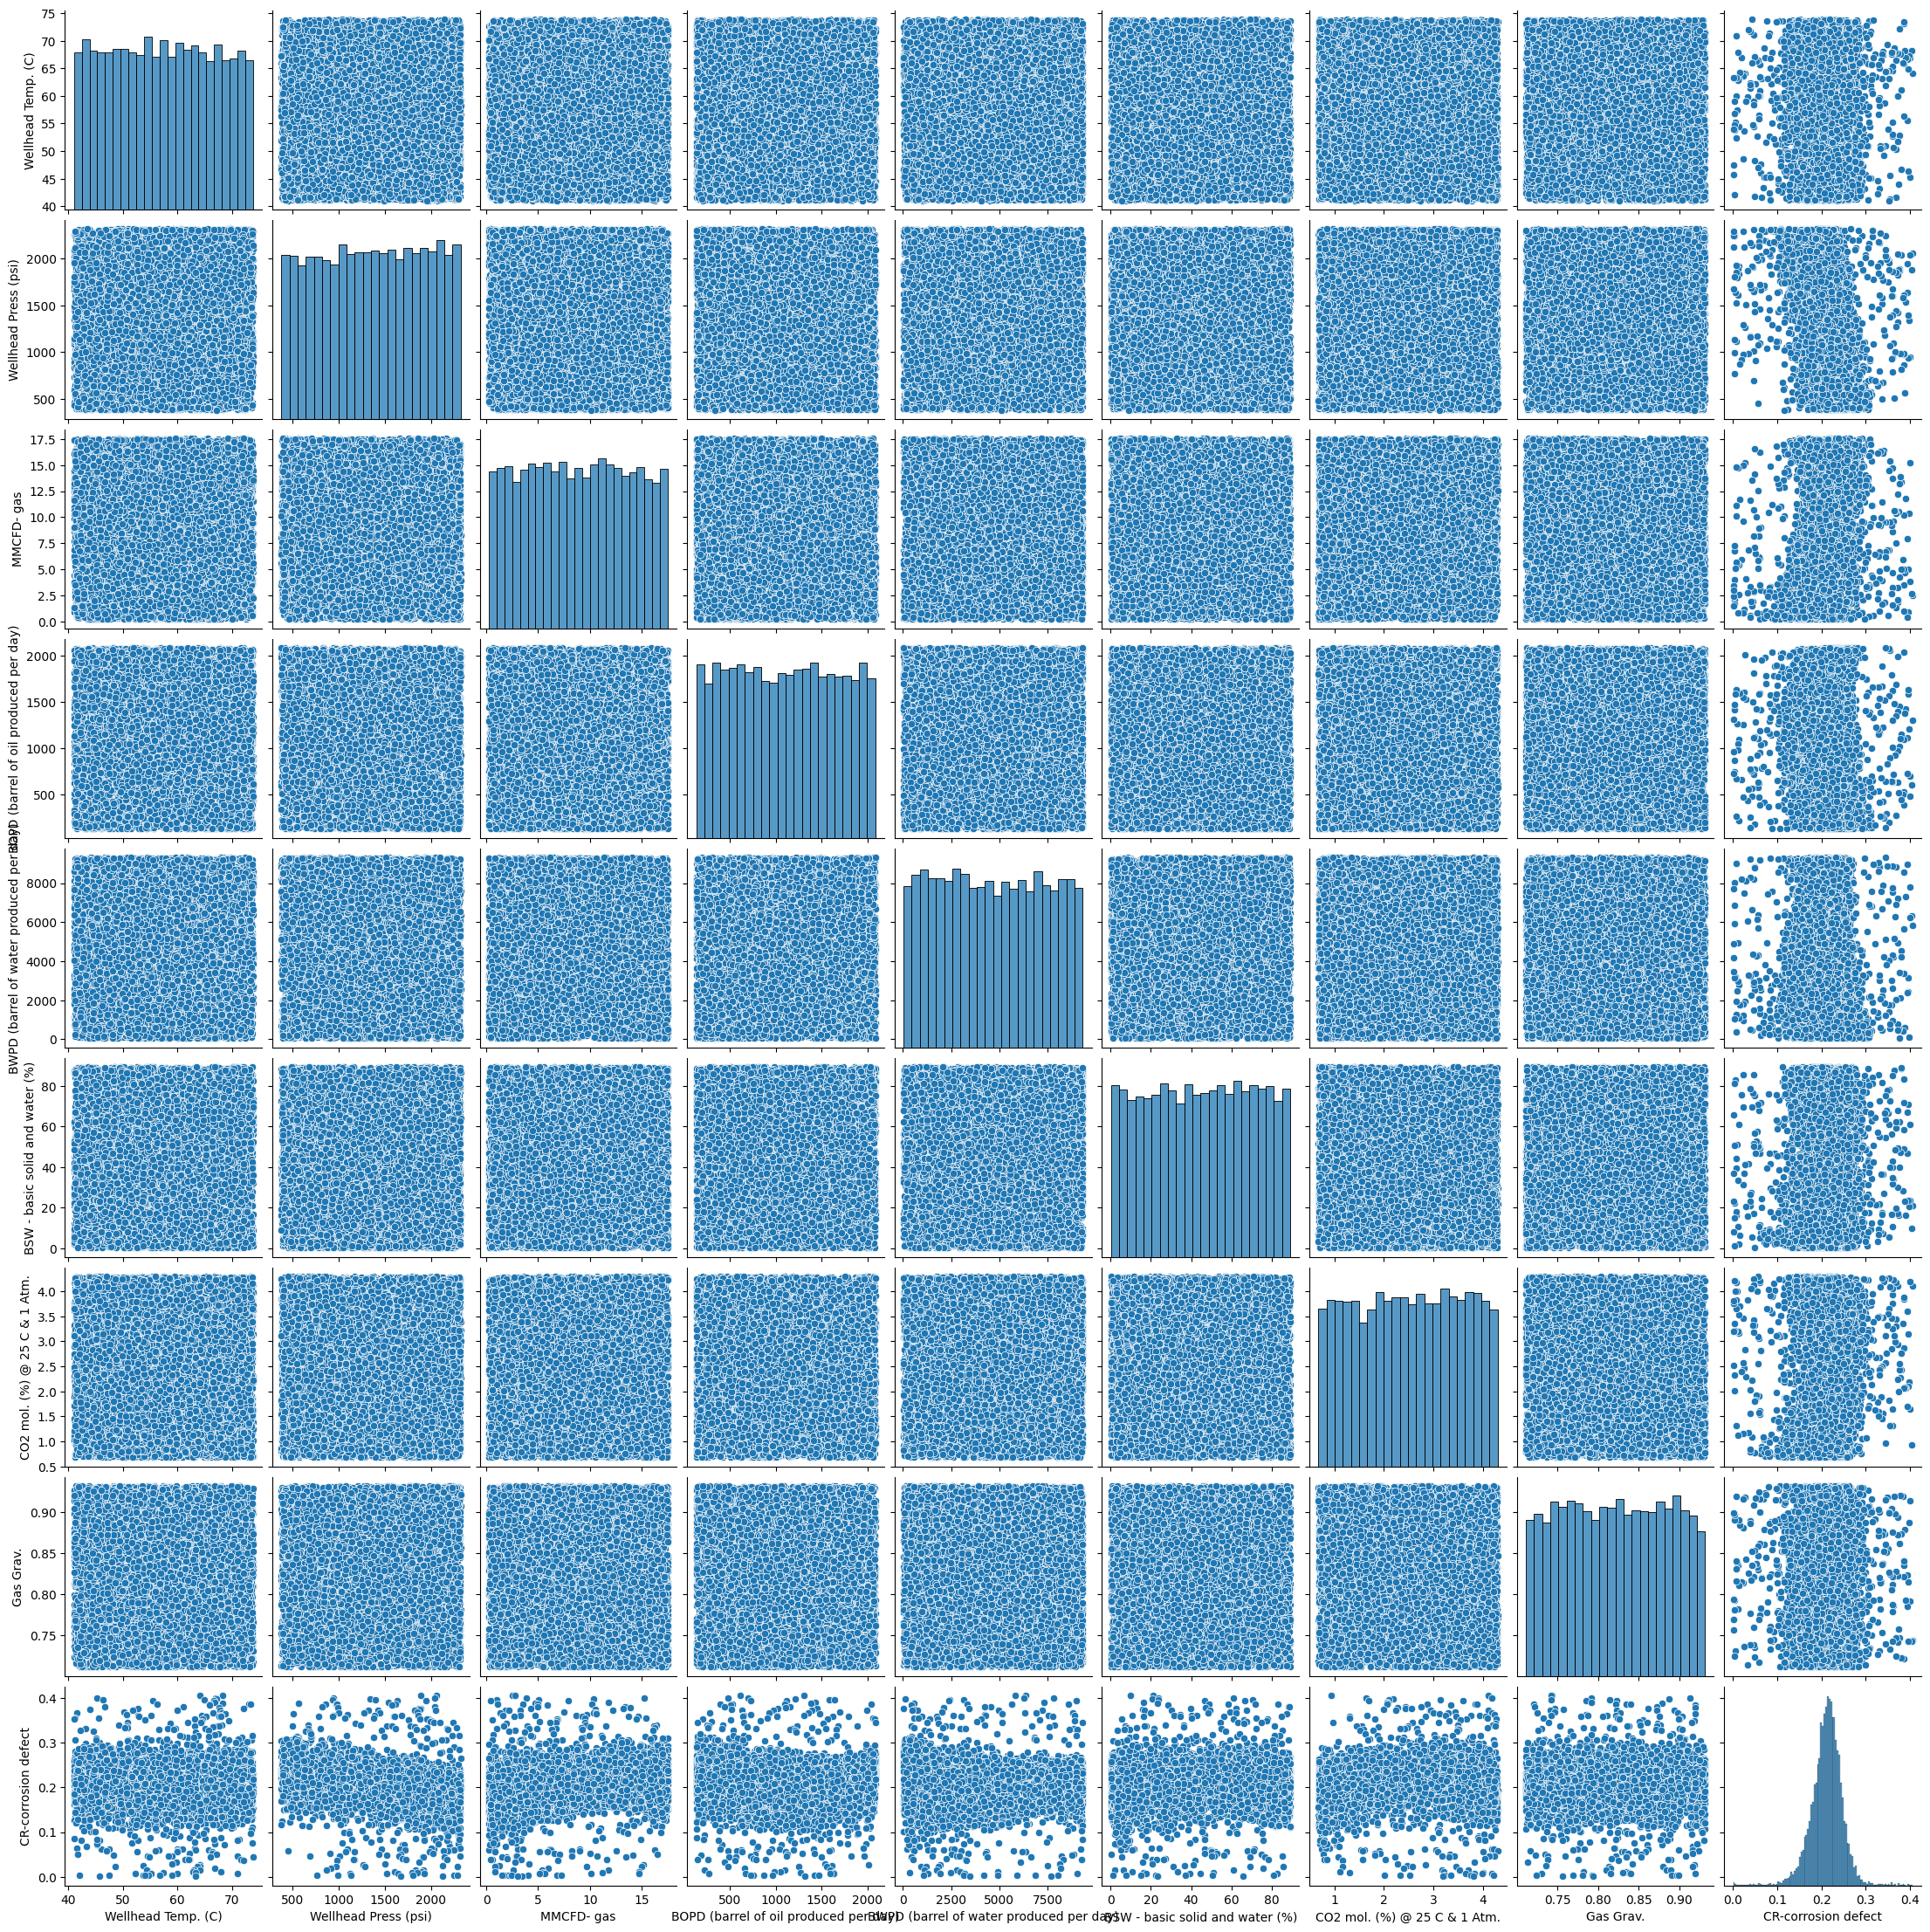

In [7]:
# Perform some graphical analysis on the data
from scipy.stats import norm
ax = sns.pairplot(data)

# Make Data Binary on basis of thresh hold

In [8]:
threshold = 0.211
data['label'] = ['low' if x <= threshold else 'high' for x in data['CR-corrosion defect']]


In [9]:
data

Wellhead Temp. (C)  Wellhead Press (psi)  MMCFD- gas  \
0                   53.35               1105.13       12.87   
1                   72.25               1026.31        3.42   
2                   65.08                722.96        6.23   
3                   60.71               1557.23       11.71   
4                   46.19               1304.42        8.58   
...                   ...                   ...         ...   
10287               56.81               2242.44        1.71   
10288               47.46               2243.44        2.42   
10289               54.03               2286.86        1.50   
10290               45.69               1674.08        3.42   
10291               63.31               2123.06        3.02   

       BOPD (barrel of oil produced per day)  \
0                                    1378.93   
1                                    1028.75   
2                                    2017.92   
3                                     558.22   
4                                    1280.47   
...                                      ...   
10287                                1470.60   
10288                                 727.07   
10289                                 967.96   
10290                                1312.84   
10291                                1312.97   

       BWPD (barrel of water produced per day)  \
0                                      2812.62   
1                                       919.92   
2                                      1212.42   
3                                      1716.09   
4                                      1929.22   
...                                        ...   
10287                                  5929.47   
10288                                  4184.95   
10289                                  4900.59   
10290                                  3476.96   
10291                                  7691.87   

       BSW - basic solid and water (%)  CO2 mol. (%) @ 25 C & 1 Atm.  \
0                                75.64                        3.3628   
1                                44.21                        3.8679   
2                                17.55                        2.3552   
3                                65.79                        1.7253   
4                                37.45                        1.8327   
...                                ...                           ...   
10287                            14.83                        2.0084   
10288                            37.04                        2.5155   
10289                             7.84                        3.7564   
10290                            23.08                        3.8039   
10291                            65.61                        3.1973   

       Gas Grav.  CR-corrosion defect label  
0         0.7205               0.2245  high  
1         0.8940               0.2262  high  
2         0.7661               0.2305  high  
3         0.7738               0.2303  high  
4         0.7611               0.2202  high  
...          ...                  ...   ...  
10287     0.7927               0.0031   low  
10288     0.7695               0.0027   low  
10289     0.8991               0.0027   low  
10290     0.7940               0.0022   low  
10291     0.7565               0.0009   low  

[10292 rows x 10 columns]

In [10]:
# Count the occurrences of each label
label_counts = data['label'].value_counts()
label_counts

label
high    5491
low     4801
Name: count, dtype: int64

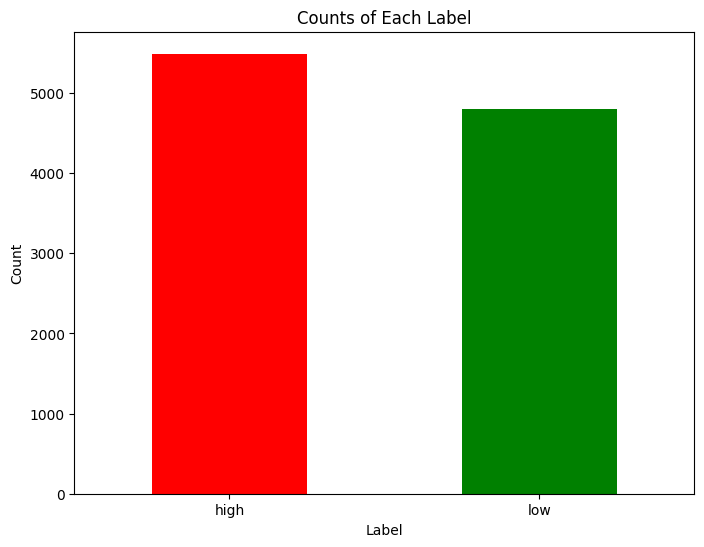

In [11]:
# Plot the counts graphically
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['Red', 'green'])
plt.title('Counts of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:
data.head()

Wellhead Temp. (C)  Wellhead Press (psi)  MMCFD- gas  \
0               53.35               1105.13       12.87   
1               72.25               1026.31        3.42   
2               65.08                722.96        6.23   
3               60.71               1557.23       11.71   
4               46.19               1304.42        8.58   

   BOPD (barrel of oil produced per day)  \
0                                1378.93   
1                                1028.75   
2                                2017.92   
3                                 558.22   
4                                1280.47   

   BWPD (barrel of water produced per day)  BSW - basic solid and water (%)  \
0                                  2812.62                            75.64   
1                                   919.92                            44.21   
2                                  1212.42                            17.55   
3                                  1716.09                            65.79   
4                                  1929.22                            37.45   

   CO2 mol. (%) @ 25 C & 1 Atm.  Gas Grav.  CR-corrosion defect label  
0                        3.3628     0.7205               0.2245  high  
1                        3.8679     0.8940               0.2262  high  
2                        2.3552     0.7661               0.2305  high  
3                        1.7253     0.7738               0.2303  high  
4                        1.8327     0.7611               0.2202  high

In [13]:
data.columns

Index(['Wellhead Temp. (C)', 'Wellhead Press (psi)', 'MMCFD- gas',
       'BOPD (barrel of oil produced per day)',
       'BWPD (barrel of water produced per day)',
       'BSW - basic solid and water (%)', 'CO2 mol. (%) @ 25 C & 1 Atm.',
       'Gas Grav.', 'CR-corrosion defect', 'label'],
      dtype='object')

# Prep-Processing

In [14]:
# Separate features and target variable
X = data.drop(columns=['label', 'CR-corrosion defect'])  # Features
y = data['label']  # Target variable

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the target variable
label_encoder.fit(y)

y_binary = label_encoder.transform(y)

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.25, random_state=42)


In [17]:
from sklearn.preprocessing import MinMaxScaler
# Feature scaling
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled contain the scaled features in the range [0, 1]


# Train MLP (Multi Layer Perceptron) Classifier

In [18]:
from sklearn.neural_network import MLPClassifier
# Train an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 100), max_iter=1000, activation='relu', solver='sgd', random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(10, 100), max_iter=1000, random_state=42,
              solver='sgd')

In [19]:
# Make predictions on the test set
mlp_y_pred = mlp_classifier.predict(X_test_scaled)

#Evaluation metrics for MLP (Multi Layer Perceptron) Classifier

In [20]:
# Evaluation metrics
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_precision = precision_score(y_test, mlp_y_pred, average='weighted')
mlp_recall = recall_score(y_test, mlp_y_pred, average='weighted')
mlp_f1 = f1_score(y_test, mlp_y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, mlp_y_pred)
class_report = classification_report(y_test, mlp_y_pred)

In [21]:
# Print evaluation metrics
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1-score:", mlp_f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.948309366498251
Precision: 0.9483590915015206
Recall: 0.948309366498251
F1-score: 0.948282231133457

Confusion Matrix:
 [[1311   57]
 [  76 1129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1368
           1       0.95      0.94      0.94      1205

    accuracy                           0.95      2573
   macro avg       0.95      0.95      0.95      2573
weighted avg       0.95      0.95      0.95      2573



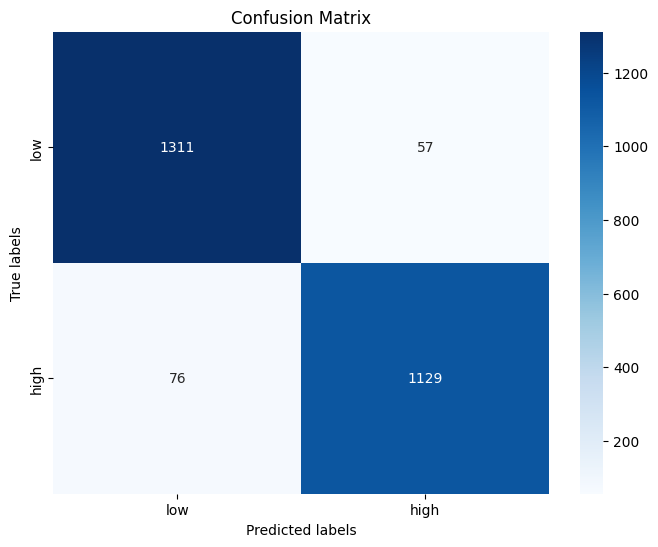

In [22]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['low', 'high'], yticklabels=['low', 'high'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#Train CatBoost Classifier

In [23]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.3 MB/s eta 0:00:00


In [24]:
from catboost import CatBoostClassifier
# Train a CatBoost classifier
catboost_classifier = CatBoostClassifier(random_state=42, verbose=False)
catboost_classifier.fit(X_train_scaled, y_train)

In [25]:
# Make predictions on the test set
catboost_y_pred = catboost_classifier.predict(X_test_scaled)

#Evaluation metrics for Catboost Classifier

In [26]:
# Evaluation metrics
catboost_accuracy = accuracy_score(y_test, catboost_y_pred)
catboost_precision = precision_score(y_test, catboost_y_pred, average='weighted')
catboost_recall = recall_score(y_test, catboost_y_pred, average='weighted')
catboost_f1 = f1_score(y_test, catboost_y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, catboost_y_pred)
class_report = classification_report(y_test, catboost_y_pred)

In [27]:
# Print evaluation metrics
print("Accuracy:", catboost_accuracy)
print("Precision:", catboost_precision)
print("Recall:", catboost_recall)
print("F1-score:", catboost_f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.952195880295375
Precision: 0.9522221923175457
Recall: 0.952195880295375
F1-score: 0.9521765080269327

Confusion Matrix:
 [[1314   54]
 [  69 1136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1368
           1       0.95      0.94      0.95      1205

    accuracy                           0.95      2573
   macro avg       0.95      0.95      0.95      2573
weighted avg       0.95      0.95      0.95      2573



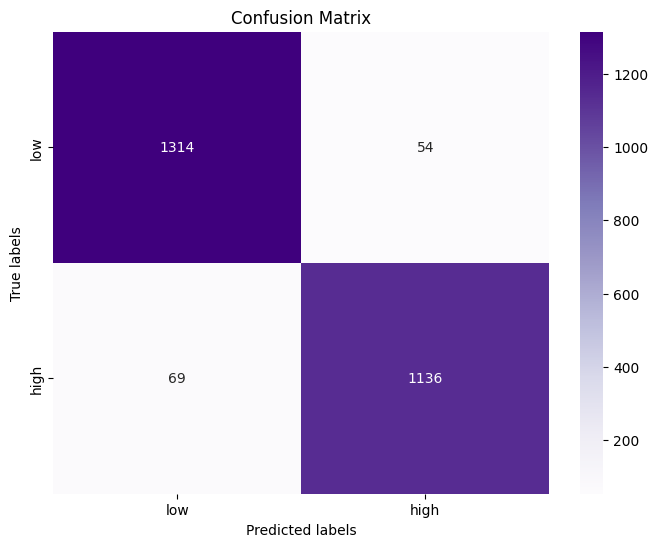

In [28]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=['low', 'high'], yticklabels=['low', 'high'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Train Support Vector Machine classifier

In [29]:
# Train Support Vector Machine classifier
svm_classifier = SVC(random_state=42, probability=True)
svm_classifier.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [30]:
svm_pred = svm_classifier.predict(X_test_scaled)

# Evaluation metrics for Support Vector Machine

In [31]:
# Evaluation metrics for Support Vector Machine
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
svm_class_report = classification_report(y_test, svm_pred)

In [32]:
print("\nSupport Vector Machine:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("\nConfusion Matrix:\n", svm_conf_matrix)
print("\nClassification Report:\n", svm_class_report)


Support Vector Machine:
Accuracy: 0.9560823940924991
Precision: 0.9560919984570758
Recall: 0.9560823940924991
F1-score: 0.9560696387629584

Confusion Matrix:
 [[1317   51]
 [  62 1143]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1368
           1       0.96      0.95      0.95      1205

    accuracy                           0.96      2573
   macro avg       0.96      0.96      0.96      2573
weighted avg       0.96      0.96      0.96      2573



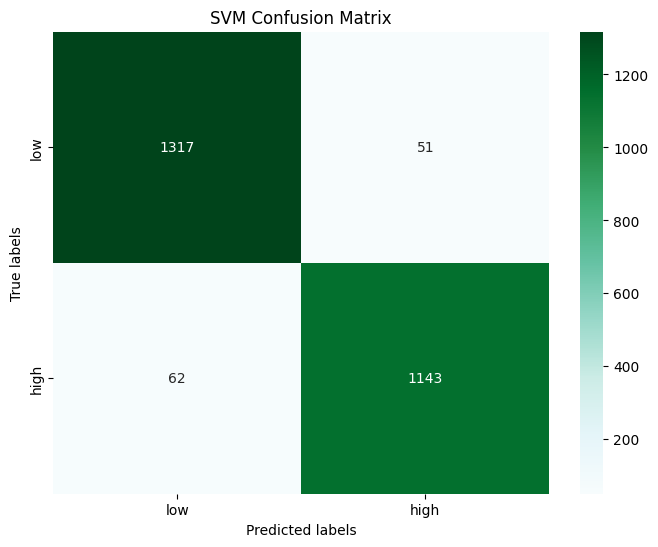

In [33]:
# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, cmap='BuGn', fmt='g', xticklabels=['low', 'high'], yticklabels=['low', 'high'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Confusion Matrix')
plt.show()

# Create a Voting Classifier with soft voting

In [34]:
# Initialize Voting Classifier with MLP, CatBoost, and SVM
mlp_classifier1 = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, activation='relu', solver='sgd', random_state=42)
catboost_classifier1 = CatBoostClassifier(random_state=42, verbose=False)
svm_classifier1 = SVC(random_state=42, probability=True)
voting_classifier = VotingClassifier(estimators=[
    ('mlp', mlp_classifier1),
    ('catboost', catboost_classifier1),
    ('svm', svm_classifier1)
], voting='soft')  # 'soft' voting uses predicted class probabilities for decision

In [35]:
# Train the Voting Classifier
voting_classifier.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(hidden_layer_sizes=(100, 100),
                                            max_iter=1000, random_state=42,
                                            solver='sgd')),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7f63513abbe0>),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

In [36]:
# Make predictions on the test set
voting_pred = voting_classifier.predict(X_test_scaled)

# Evaluation metrics for Voting Classifier

In [37]:
# Evaluation metrics
voting_accuracy = accuracy_score(y_test, voting_pred)
voting_precision = precision_score(y_test, voting_pred, average='weighted')
voting_recall = recall_score(y_test, voting_pred, average='weighted')
voting_f1 = f1_score(y_test, voting_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, voting_pred)
class_report = classification_report(y_test, voting_pred)

In [38]:
# Print evaluation metrics
print("Voting Classifier:")
print("Accuracy:", voting_accuracy)
print("Precision:", voting_precision)
print("Recall:", voting_recall)
print("F1-score:", voting_f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Voting Classifier:
Accuracy: 0.9665759813447338
Precision: 0.9665738080607202
Recall: 0.9665759813447338
F1-score: 0.9665743083958228

Confusion Matrix:
 [[1326   42]
 [  44 1161]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1368
           1       0.97      0.96      0.96      1205

    accuracy                           0.97      2573
   macro avg       0.97      0.97      0.97      2573
weighted avg       0.97      0.97      0.97      2573



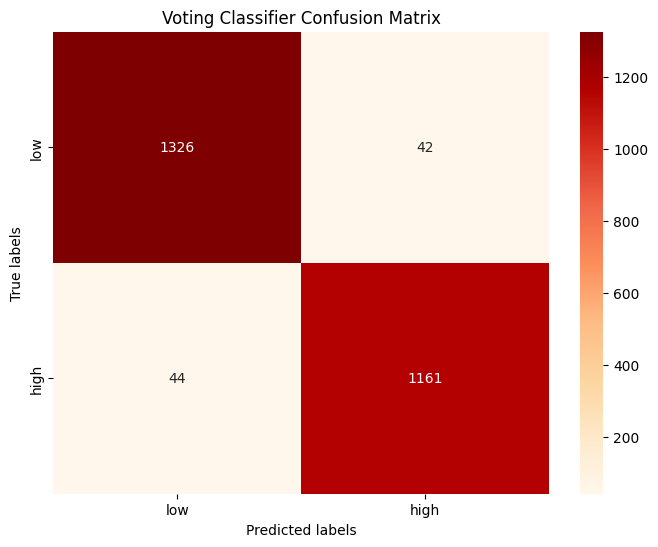

In [39]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='OrRd', fmt='g', xticklabels=['low', 'high'], yticklabels=['low', 'high'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Voting Classifier Confusion Matrix')
plt.show()

#Comparison of Evaluation Metrics

In [40]:
import pandas as pd

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['MLP', 'CatBoost', 'SVM', 'Voting Classifier'],
    'Accuracy': [mlp_accuracy, catboost_accuracy, svm_accuracy, voting_accuracy],
    'Precision': [mlp_precision, catboost_precision, svm_precision, voting_precision],
    'Recall': [mlp_recall, catboost_recall, svm_recall, voting_recall],
    'F1-score': [mlp_f1, catboost_f1, svm_f1, voting_f1]
})

<Figure size 1000x600 with 0 Axes>

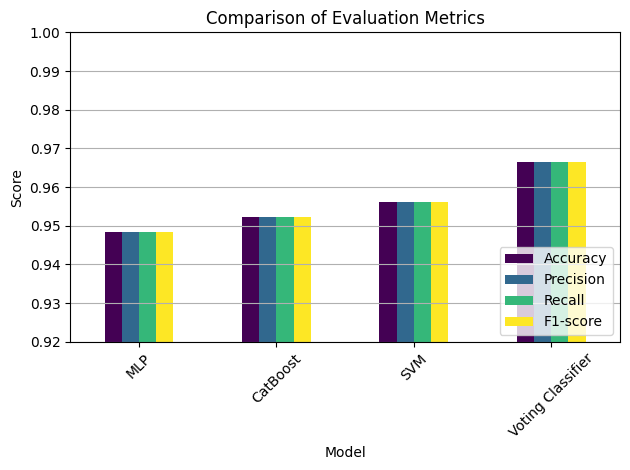

In [41]:
# Plot comparison graph with custom y-axis range
plt.figure(figsize=(10, 6))
ax = metrics_df.set_index('Model').plot(kind='bar', colormap='viridis')
plt.title('Comparison of Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')

# Set y-axis range
plt.ylim(0.92, 1.0)



plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

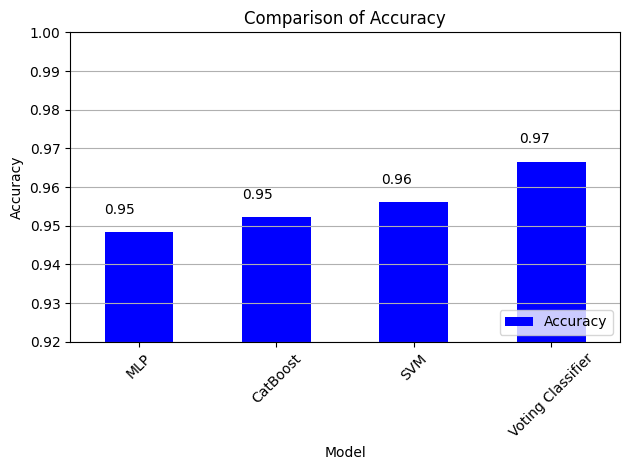

<Figure size 1000x600 with 0 Axes>

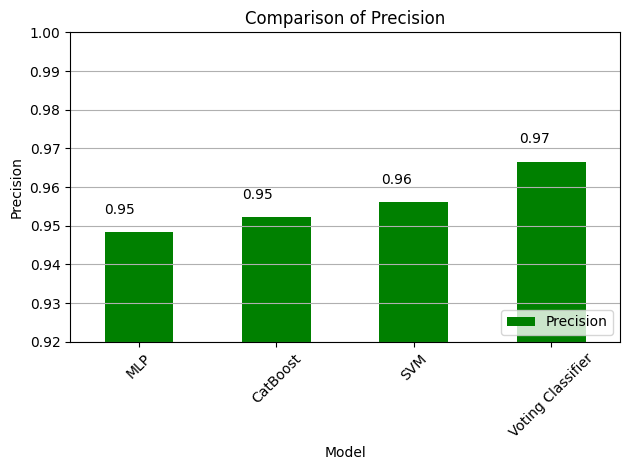

<Figure size 1000x600 with 0 Axes>

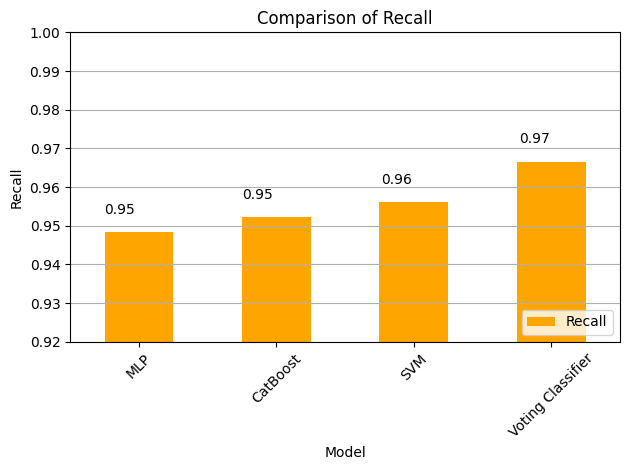

<Figure size 1000x600 with 0 Axes>

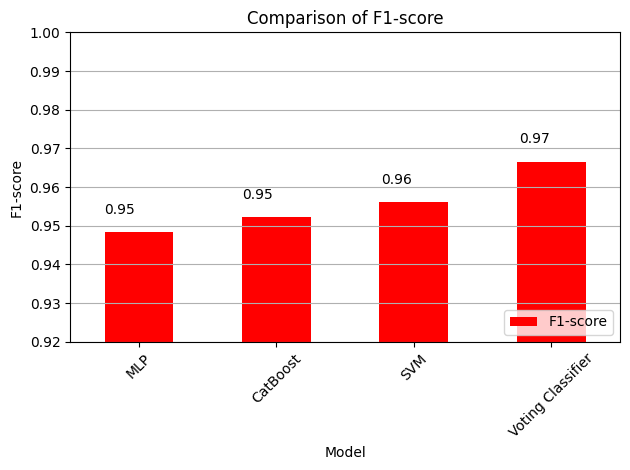

In [42]:
# Define solid colors for each evaluation metric
colors = ['blue', 'green', 'orange', 'red']

# Plot each evaluation metric separately with custom y-axis range and solid colors
for metric, color in zip(['Accuracy', 'Precision', 'Recall', 'F1-score'], colors):
    plt.figure(figsize=(10, 6))
    ax = metrics_df.plot(x='Model', y=metric, kind='bar', color=color)
    plt.title(f'Comparison of {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.grid(axis='y')

    # Set y-axis range
    plt.ylim(0.92, 1.0)

    # Add text annotations
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.tight_layout()
    plt.show()


# Prediction on New Random Data

In [43]:
data.columns

Index(['Wellhead Temp. (C)', 'Wellhead Press (psi)', 'MMCFD- gas',
       'BOPD (barrel of oil produced per day)',
       'BWPD (barrel of water produced per day)',
       'BSW - basic solid and water (%)', 'CO2 mol. (%) @ 25 C & 1 Atm.',
       'Gas Grav.', 'CR-corrosion defect', 'label'],
      dtype='object')

In [44]:
low_example = [63.31,2123.06,3.02,1312.97,7691.87,65.61,3.1973,0.7565]
High_example = [53.35,1105.13,12.87,1378.93,2812.62,75.64,3.3628,0.7205]

In [45]:
# Make predictions on a test/fake data row
test_data = [High_example]  # Example test data
test_data_scaled = scaler.transform(test_data)
prediction = voting_classifier.predict(test_data_scaled)

# Reverse the encoding on the predicted labels
y_pred_labels = label_encoder.inverse_transform(prediction)

# Now you can see the original labels
print("\nPredicted label for test data:", y_pred_labels[0])


Predicted label for test data: high
